# Graded Challenge 4 Phase 1
Nama: Judan Syamsul Hadad

Batch: FTDS-009

## 1. Perkenalan

Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Judan Syamsul Hadad** dengan handlename **Riezn** merupakan salah satu pesertanya.

Dataset yang digunakan pada notebook ini dapat diunduh [disini](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata). Dataset ini berisi data pengguna kartu kredit dan detail aktivitas belanja yang dilakukan.

Berikut keterangan dataset yang digunakan:
- `CUSTID` : Identification of Credit Card holder (Categorical)
- `BALANCE` : Balance amount left in their account to make purchases
- `BALANCEFREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- `PURCHASES` : Amount of purchases made from account
- `ONEOFFPURCHASES` : Maximum purchase amount done in one-go
- `INSTALLMENTSPURCHASES` : Amount of purchase done in installment
- `CASHADVANCE` : Cash in advance given by the user
- `PURCHASESFREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- `ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- `PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- `CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid
- `CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"
- `PURCHASESTRX` : Numbe of purchase transactions made
- `CREDITLIMIT` : Limit of Credit Card for user
- `PAYMENTS` : Amount of Payment done by user
- `MINIMUM_PAYMENTS` : Minimum amount of payments made by user
- `PRCFULLPAYMENT` : Percent of full payment paid by user
- `TENURE` : Tenure of credit card service for user

### 1.1. Objective
Pada notebook ini akan dilakukan clustering terhadap dataset dengan tahapan berikut:
1. Exploratory Data Analysis
2. Data Preprocessing
    - Handling outliers
    - Handling missing values
    - Feature scaling
3. Principal Component Analysis
    - Variance Inflation Factor
    - Explained Variance Ratio
4. Model Definition
    - K-Means
    - Gaussian Mixture Model
    - DBSCAN
5. Model Training
6. Model Evaluation
    - Cluster Visualization with PCA
    - Cluster Exploratory Data Analysis

### 1.2. Problem Statement
Bagaimana karakteristik masing-masing cluster yang dihasilkan dari clustering data pengguna kartu kredit?

## 2. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#models
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import BayesianGaussianMixture
from sklearn.neighbors import NearestNeighbors

#metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## 3. Data Loading

Definisikan random state untuk seluruh kode di notebook ini.

In [2]:
random_state = 34

Set display agar menampilkan seluruh kolom.

In [3]:
pd.set_option('display.max_columns', None)

Load dataset.

In [4]:
data = pd.read_csv('CC GENERAL.csv')

Copy dataset.

In [5]:
df = data.copy()

Cek lima data teratas.

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Cek jumlah non-missing value dan tipe data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Terdapat 8950 baris dan 18 kolom pada dataset. Ada beberapa kolom yang memiliki missing value.

Cek missing value pada dataset.

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Kolom `CREDIT_LIMIT` memiliki 1 missing value dan kolom `MINIMUM_PAYMENTS` memiliki 313 missing value. Simpan nama kolom untuk handling pada bab berikutnya.

In [9]:
misval_cols = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

Cek jumlah nilai unik di masing-masing kolom.

In [10]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Kolom `CUST_ID` bersifat sebagai primary key pada dataset.

Cek statistika deskriptif dari dataset.

In [11]:
df.describe().T.drop(columns=['count'])

,mean,std,min,25%,50%,75%,max
BALANCE,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Sebagian besar kolom memiliki outlier baik di sisi minimum maupun maksimum.

Selanjutnya cek apakah ada duplikat.

In [12]:
df.duplicated().sum()

0

Tidak ada duplikat pada dataset.

## 4. Exploratory Data Analysis (EDA)

### Histogram

Cek distribusi data pada masing-masing kolom.

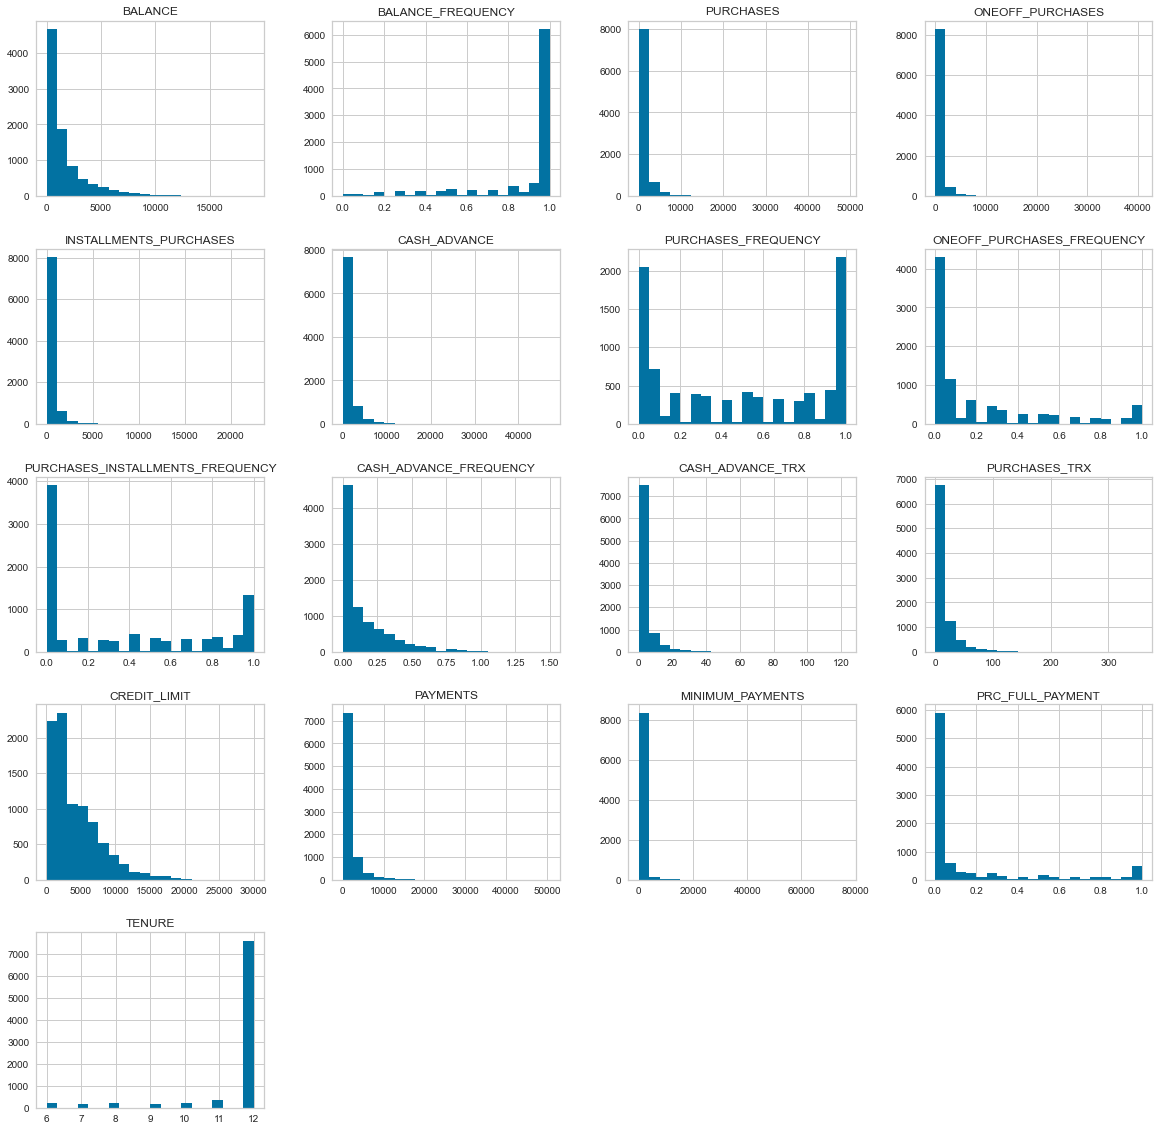

In [13]:
df.drop(columns='CUST_ID').hist(bins=20, figsize=(20,20))
plt.show()

Semua data terlihat memiliki distribusi skew dengan outlier yang nilainya jauh terhadap median.

### Boxplot

Cek sebaran data dengan boxplot.

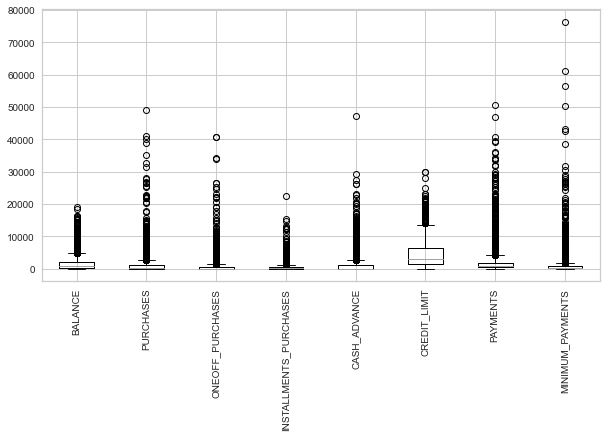

In [14]:
num = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
df[num].boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

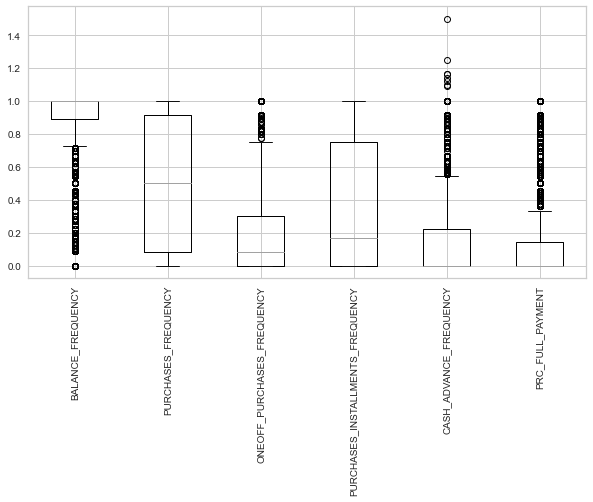

In [15]:
freq = [col for col in df.columns.tolist() if 'FREQUENCY' in col] + ['PRC_FULL_PAYMENT']
df[freq].boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

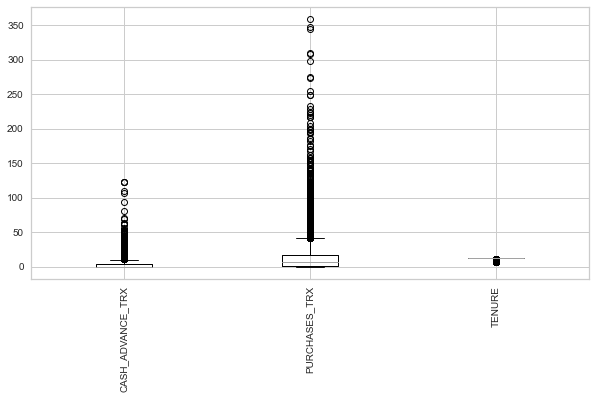

In [16]:
df[[x for x in df.columns.tolist() if x not in num + freq]].drop('CUST_ID', axis=1).boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

Dari keseluruhan feature, hanya `PURCHASE_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY` yang terlihat tidak ada outlier.

### Heatmap

Cek korelasi antar feature numerik pada dataset.

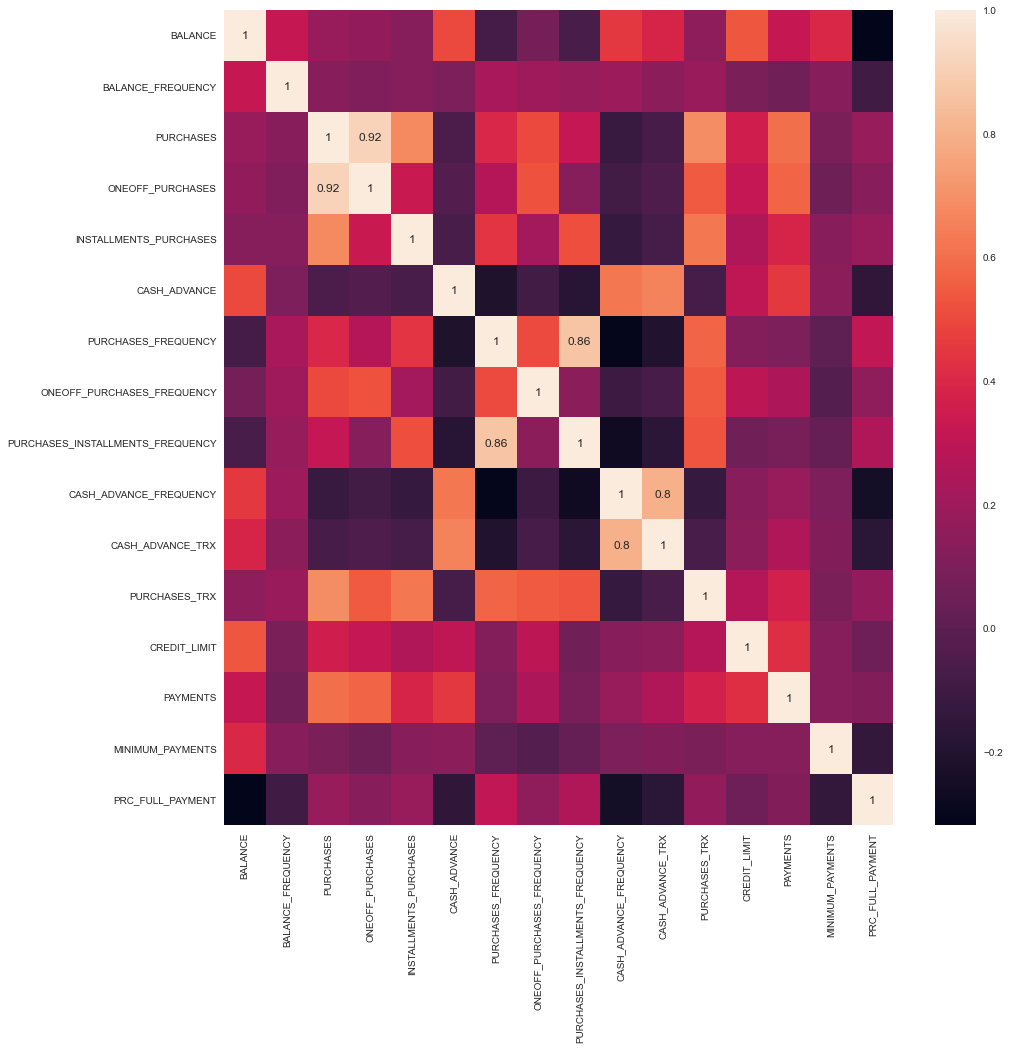

In [17]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.drop(columns=['TENURE','CUST_ID']).corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

Ada beberapa feature yang berkorelasi, yaitu:
- `PURCHASES` dan `ONE_OFF_PURCHASES`
- `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY`
- `CASH_ADVANCE` dan `CASH_ADVANCE_FREQUENCY`

## 5. Data Preprocessing

Pisahkan data untuk inference.

In [67]:
df_inf = df.dropna().sample(3, random_state=random_state)
df.drop(index=df_inf.index, inplace=True)
df_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7272,C17468,857.256959,0.909091,636.84,484.2,152.64,2224.941246,0.416667,0.166667,0.166667,0.500000,11,7,3000.0,443.001353,301.273706,0.000000,12
3432,C13529,874.800721,0.909091,0.00,0.0,0.00,557.540201,0.000000,0.000000,0.000000,0.166667,2,0,1700.0,1915.107195,200.032263,0.090909,12
829,C10860,4270.148411,0.888889,363.00,363.0,0.00,5307.322893,0.111111,0.111111,0.000000,0.555556,11,2,5500.0,1250.695005,2070.907379,0.000000,9


Deklarasi data untuk training dengan mengeluarkan primary key dan feature kategorik dari train set.

In [68]:
df_num = df.drop(columns=['TENURE','CUST_ID'])

### 5.1. Outliers Handling

Buat fungsi untuk deteksi outlier.

In [69]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

In [70]:
def outliersum(dataframe):
    #variable untuk summary
    distribution = []
    skewness = []
    upper_limit = []
    lower_limit = []
    outliers_percent = []
    max = []
    min = []

    #loop untuk summary outlier
    for column in dataframe.columns:

        #cek skewness
        col_skewness = dataframe[column].skew()

        #conditional berdasarkan skewnewss
        if (col_skewness >= -0.5) & (col_skewness <= 0.5):
            col_distribution = 'Normal'
            col_upper_limit, col_lower_limit = find_normal_boundaries(dataframe,column)      
        else:
            col_distribution = 'Skewed'
            col_upper_limit, col_lower_limit = find_skewed_boundaries(dataframe,column)
        
        #cek min,max, dan jumlah outlier
        col_max = dataframe[column].max()
        col_min = dataframe[column].min()
        col_outliers_percent = (len(dataframe[dataframe[column] > col_upper_limit]) +  \
                                len(dataframe[dataframe[column] < col_lower_limit])) / \
                                len(dataframe) * 100
        
        #update summary per loop
        distribution.append(col_distribution)
        skewness.append(col_skewness)
        upper_limit.append(col_upper_limit)
        max.append(col_max)
        min.append(col_min)
        lower_limit.append(col_lower_limit)
        outliers_percent.append(col_outliers_percent)

    #df summary
    outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'min':min , 'lower_limit':lower_limit, 'upper_limit':upper_limit, 'max':max, 'outliers_percent':outliers_percent}
    outliers_summary = pd.DataFrame(outliers_summary,index=dataframe.columns)
    outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
    outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
    return outliers_summary

Cek rangkuman outlier.

In [71]:
outsum = outliersum(df_num)
outsum

,distribution_type,skewnewss,min,lower_limit,upper_limit,max,outliers_percent
BALANCE_FREQUENCY,Skewed,-2.02,0.00,0.72,1.17,1.00,16.69
PRC_FULL_PAYMENT,Skewed,1.94,0.00,-0.21,0.36,1.00,16.47
CASH_ADVANCE,Skewed,5.17,0.00,-1670.41,2784.02,47137.21,11.52
ONEOFF_PURCHASES,Skewed,10.04,0.00,-866.92,1444.86,40761.25,11.32
INSTALLMENTS_PURCHASES,Skewed,7.30,0.00,-703.24,1172.06,22500.00,9.69
MINIMUM_PAYMENTS,Skewed,13.62,0.02,-815.42,1809.94,76406.21,9.40
PURCHASES,Skewed,8.14,0.00,-1566.22,2716.20,49039.57,9.03
PAYMENTS,Skewed,5.91,0.00,-1893.35,4177.59,50721.48,9.03
CASH_ADVANCE_TRX,Skewed,5.72,0.00,-6.00,10.00,123.00,8.96
ONEOFF_PURCHASES_FREQUENCY,Skewed,1.54,0.00,-0.45,0.75,1.00,8.74


Meskipun banyak outlier, data tersebut merupakan nilai yang valid dan bukan karena kesalahan input. Oleh karena itu outlier akan dibiarkan.

### 5.2. Missing Values Handling

Cek jumlah missing value pada dataset.

In [72]:
df_num[misval_cols].isnull().sum()

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Lakukan handling missing value per kolom.

#### `CREDIT_LIMIT`

Cek data dengan missing value.

In [73]:
df_num[df_num['CREDIT_LIMIT'].isnull()==True]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0


User ini hanya pernah melakukan satu kali transaksi untuk `CASH_ADVANCE`, maka dari itu kita anggap bahwa `CREDIT_LIMIT`-nya hanya sebesar `CASH_ADVANCE` yang ditarik.

In [74]:
df_num['CREDIT_LIMIT'].fillna(df_num[df_num['CREDIT_LIMIT'].isnull()==True]['CASH_ADVANCE'], inplace=True)

Cek ulang hasil imputasi.

In [75]:
df_num.loc[5203]['CREDIT_LIMIT']

186.853063

#### `MINIMUM_PAYMENTS`

Cek data dengan missing value pada `MINIMUM_PAYMENTS`.

In [76]:
df_num[df_num['MINIMUM_PAYMENTS'].isnull()==True][['BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']].sort_values('PAYMENTS',ascending=False)

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
1155,34.207779,2483.26,0.000000,29272.486070,NaN,0.0
3852,0.000000,1200.00,0.000000,14229.882480,NaN,0.0
6522,19.516936,851.00,0.000000,9821.138115,NaN,0.0
5107,0.000000,0.00,465.571691,6112.512276,NaN,0.0
2912,0.000000,199.73,0.000000,5557.460834,NaN,0.0
...,...,...,...,...,...,...
2557,8.187263,0.00,793.848237,0.000000,NaN,0.0
2621,1.365808,60.00,0.000000,0.000000,NaN,0.0
2630,0.000000,1090.69,0.000000,0.000000,NaN,0.0
2883,39.642014,0.00,45.175571,0.000000,NaN,0.0


User pada kelompok ini sepertinya memiliki kesamaan dimana tidak satupun user pernah melakukan pembayaran untuk tenure ini, tetapi hal ini tidak bisa menjelaskan mengapa `MINIMUM_PAYMENTS`-nya menjadi missing value. Oleh karena itu, asumsikan bahwa `MINIMUM_PAYMENTS`-nya sebesar 2% dari `BALANCE` yang dimiliki user. Nilai ini merupakan nilai yang umum digunakan oleh instansi perbankan.

In [77]:
df_num['MINIMUM_PAYMENTS'].fillna(df_num[df_num['MINIMUM_PAYMENTS'].isnull()==True]['BALANCE']*0.02,inplace=True)

Cek ulang missing value pada `MINIMUM_PAYMENTS`.

In [78]:
df_num[df_num['MINIMUM_PAYMENTS'].isnull()==True]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT


Sudah tidak ada missing value.

### 5.3. Feature Scaling & Normalization

Karena salah satu algoritma clustering yang digunakan adalah K-Means, maka feature scaling harus dilakukan dengan Standard Scaler agar jarak yang diukur pada algoritma dapat dibandingkan antar feature. Selain itu karena `distance` yang digunakan mayoritas adalah `Euclidean`, maka data akan dinormalisasi juga.

In [79]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

In [80]:
normalizer = Normalizer()
df_scaled = normalizer.fit_transform(df_scaled)

Ubah data kembali menjadi dataframe untuk PCA.

In [81]:
df_scaled = pd.DataFrame(df_scaled, columns=df_num.columns)

### 5.4. Variance Inflation Factor

Cek nilai VIF pada dataset untuk masing-masing kolom.

In [82]:
#pembuatan dataframe VIF
df_vif = pd.DataFrame()
df_vif["Feature"] = df_scaled.columns
  
#hitung dan urutkan VIF dari kecil ke besar
df_vif["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_scaled.columns))]
df_vif.sort_values('VIF',ascending=True,inplace=True)
df_vif.reset_index(drop=True,inplace=True)
df_vif

,Feature,VIF
0,BALANCE_FREQUENCY,1.238032
1,PRC_FULL_PAYMENT,1.339428
2,MINIMUM_PAYMENTS,1.540337
3,CREDIT_LIMIT,1.612607
4,PAYMENTS,1.943110
5,CASH_ADVANCE,2.586898
6,BALANCE,2.630991
7,CASH_ADVANCE_FREQUENCY,4.237925
8,PURCHASES_TRX,4.250138
9,CASH_ADVANCE_TRX,4.314385


Ada 10 feature dengan VIF kurang dari 5. Pastikan kembali dengan Explained Variance Ratio apakah dengan 10 feature sudah bisa mencakup mayoritas data yang digunakan.

### 5.5. Explained Variance Ratio

Hitung EVR pada dataset.

In [83]:
df_evr = PCA().fit(df_scaled)

In [84]:
col_length = len(df_scaled.columns) + 1

Plot EVR dan cummulative EVR terhadap jumlah komponen.

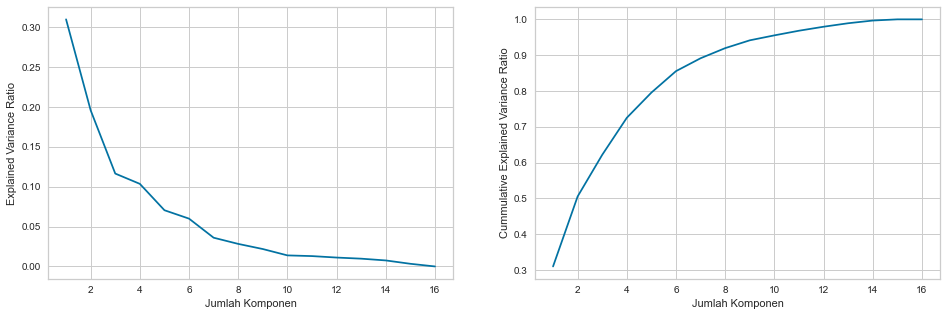

In [85]:
fig,ax=plt.subplots(ncols=2, figsize=(16,5))
ax[0].plot(range(1,col_length), df_evr.explained_variance_ratio_)
ax[0].set_xlabel('Jumlah Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,col_length), np.cumsum(df_evr.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Cummulative Explained Variance Ratio')
plt.show()

Dari grafik diperkirakan bahwa 95% EVR terwakilkan dengan 10 feature saja. Lakukan reduksi dengan PCA.

### 5.6. Component Reduction

Reduksi feature menjadi 95% EVR berdasarkan analisis VIF dan EVR yang telah dilakukan.

In [86]:
pca = PCA(n_components=0.95)

In [87]:
df_pca = pca.fit_transform(df_scaled)

Cek ukuran data setelah PCA.

In [88]:
df_pca.shape

(8947, 10)

### 5.7. Cluster Size Initial Check

Sebelum melakukan modeling, cek terlebih dahulu visualisasi sebaran dataset.

In [89]:
#reduksi ke 2 dimensi
pca_vis2d = PCA(n_components=2, random_state=random_state)
df_pca_vis2d = pca_vis2d.fit_transform(df_pca)

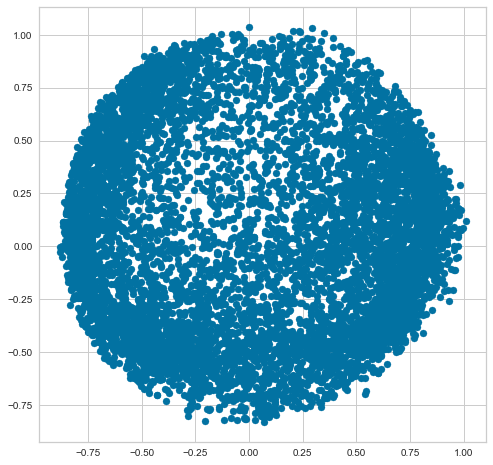

In [90]:
#plot 2 dimensi
plt.figure(figsize=(8,8))
plt.scatter(x=df_pca_vis2d[:,0], y=df_pca_vis2d[:,1])
plt.show()

Sebaran data sulit untuk ditebak akan membentuk berapa kluster.

## 6. Model Definition

Modeling akan dilakukan dengan tiga algoritma, yaitu:
- K-Means
- Bayesian Gaussian Mixture Model
- DBSCAN

### 6.1. K-Means

In [91]:
kmeans = KMeans(random_state=random_state, init='k-means++')

### 6.2. Bayesian Gaussian Mixture Model

In [92]:
bgm = BayesianGaussianMixture(n_components=10,random_state=random_state,n_init=10)

### 6.3. DBSCAN

In [93]:
dbscan = DBSCAN()

## 7. Model Training

Lakukan training untuk masing-masing model dengan mempertimbangkan metrics yang dihasilkan.

### 7.1. K-Means

In [94]:
#list untuk menampung metrics
inertia = []
silhouette = []
range_values = range(2,10)

#loop clustering untuk jumlah kluster sebanyak range_values
for i in range_values:
    kmeans = KMeans(n_clusters = i, random_state=random_state)
    cls_pred = kmeans.fit_predict(df_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_pca, cls_pred))

#dataframe untuk menampung metrics
df_inertia = pd.DataFrame({'inertia':inertia, 'silhouette':silhouette}).reset_index()
df_inertia['index']+=2
df_inertia.rename(columns={'index':'k'},inplace=True)

### 7.2. Bayesian Gaussian Mixture Model

In [95]:
bgm.fit(df_pca)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=34)

### 7.3. DBSCAN

In [96]:
#nearest neighbors untuk mengestimasi epsilon dari berapa banyak data yang tercakup oleh cluster
neigh = NearestNeighbors(n_neighbors=9, n_jobs=-1)
nbrs = neigh.fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

#deklarasi model DBSCAN
db = DBSCAN(eps=0.35, min_samples=10) 
  
#training dan prediksi cluster
db_label = db.fit_predict(df_pca)

## 8. Model Evaluation

### 8.1. K-Means

Visualisasikan inertia dan silhouette score terhadap jumlah kluster.

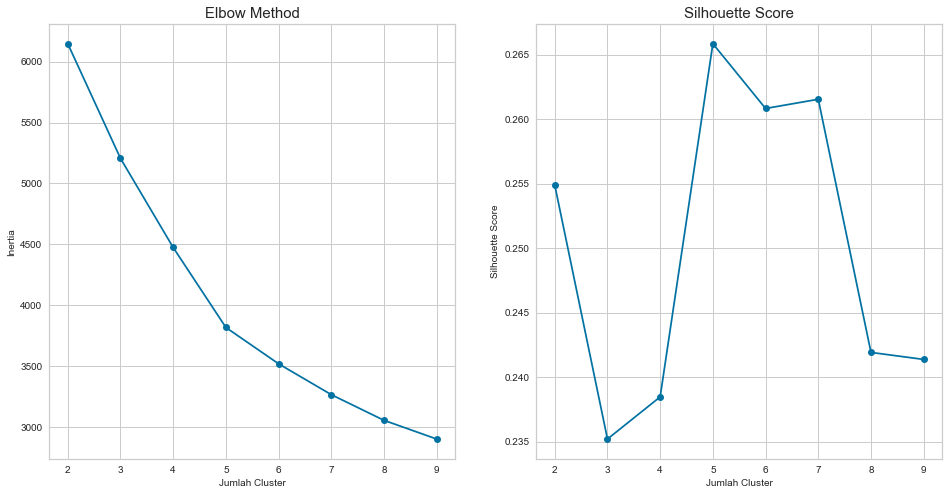

In [97]:
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
plt.subplot(1,2,1)
ax[0] = plt.plot(df_inertia['k'], df_inertia['inertia'], marker = 'o')
ax[0] = plt.xlabel('Jumlah Cluster', fontsize = 10)
ax[0] = plt.ylabel('Inertia', fontsize = 10)
ax[0] = plt.title('Elbow Method', fontsize = 15)

plt.subplot(1,2,2)
ax[1] = plt.plot(df_inertia['k'], df_inertia['silhouette'], marker = 'o')
ax[1] = plt.xlabel('Jumlah Cluster', fontsize = 10)
ax[1] = plt.ylabel('Silhouette Score', fontsize = 10)
ax[1] = plt.title('Silhouette Score', fontsize = 15)
plt.show()

Dengan menggunakan elbow method, diperkirakan jumlah cluster terbaik adalah 5. Jika melihat silhouette score, jumlah cluster dengan kemiripan tertinggi juga didapat pada angka 5. Lihat visualisasi silhouette score berikut.

In [98]:
def plot_silhouette(dataframe, clussize):
    # Silhoutte Score for K-means
    min_range = clussize - 1
    max_range = clussize + 1
    k_range = range(min_range, max_range+1)
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    for n_cluster in k_range:
        km = KMeans(n_clusters=n_cluster, random_state=random_state).fit(dataframe)
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=axes[n_cluster-min_range])
        visualizer.fit(dataframe)
        visualizer.finalize()
        axes[n_cluster-min_range].set_xlim(-0.1, 1)

    plt.tight_layout()

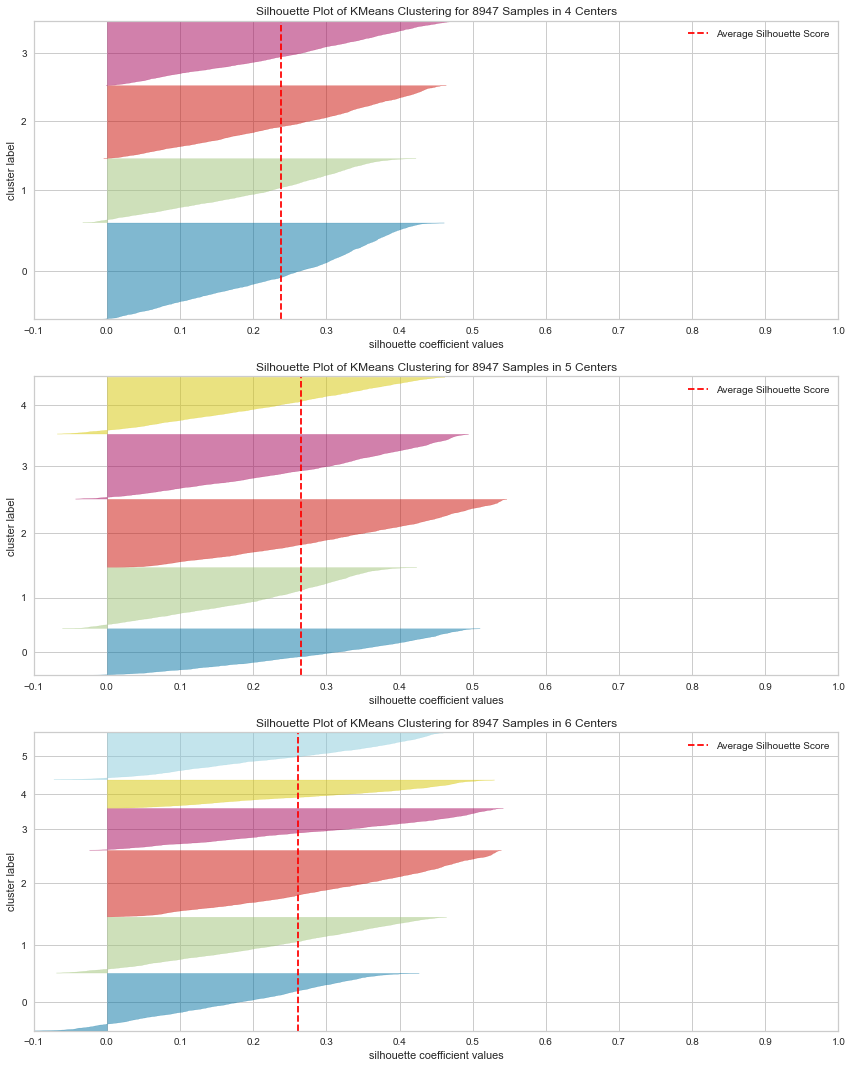

In [99]:
plot_silhouette(df_pca, 5)

Meskipun dari inertia dan silhouette score menunjukkan bahwa 5 kluster menghasilkan prediksi yang terbaik, tetapi penulis merasa bahwa jumlah kluster 4 memiliki bentuk silhouette yang lebih baik sehingga proses clustering dilakukan dengan jumlah kluster 4.

Prediksi label pada train set.

In [100]:
kmeans = KMeans(n_clusters = 4, random_state=random_state)
kmeans.fit_predict(df_pca)
km_label = kmeans.labels_

Reduksi train set ke 2 dimensi untuk visualisasi.

In [101]:
pca_vis2d = PCA(n_components=2, random_state=random_state)
df_pca_vis2d = pca_vis2d.fit_transform(df_pca)

Visualisasikan hasil prediksi label pada train set.

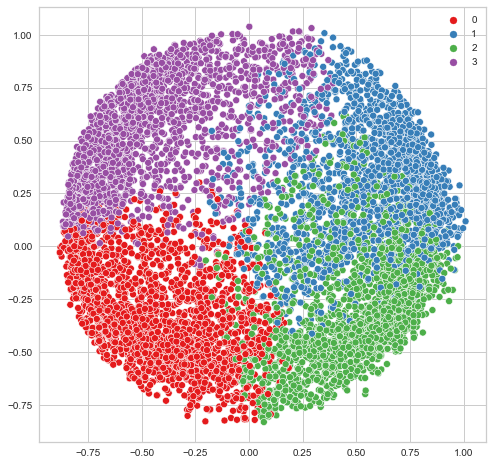

In [102]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_pca_vis2d[:,0], y=df_pca_vis2d[:,1], hue=km_label, palette='Set1')
plt.show()

Kluster terlihat memiliki batasan yang cukup jelas meskipun ada beberapa yang terlihat overlapping.

### 8.2. Bayesian Gaussian Mixture Model

Pada dasarnya Bayesian GMM dapat memprediksi jumlah kluster terbaik berdasarkan bobot pada masing-masing kluster. Cek bobot yang dihasilkan.

In [103]:
bgm.weights_

array([0.06198313, 0.08993852, 0.05353501, 0.15465417, 0.11779252,
       0.15708902, 0.07207853, 0.10984875, 0.13456189, 0.04851846])

Dari 10 bobot yang dihasilkan, semuanya terlihat memiliki angka yang signifikan. Jika pada model training n_components dinaikkan lagi, kemungkinan jumlah kluster juga akan meningkat. Disimpulkan bahwa BGMM tidak dapat memprediksi jumlah kluster dengan baik ketika bentuk data seperti visualisasi pada K-Means.

Cek cluster yang dihasilkan oleh BGMM dengan visualisasi 2 dimensi.

In [104]:
bgm_label = bgm.fit_predict(df_pca)

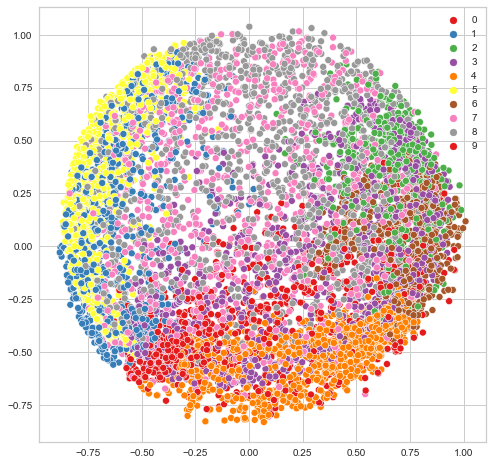

In [105]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_pca_vis2d[:,0], y=df_pca_vis2d[:,1], hue=bgm_label, palette='Set1')
plt.show()

Distribusi cluster yang dihasilkan acak.

### 8.3. DBSCAN

Model DBSCAN yang digunakan menggunakan nilai epsilon berdasarkan belokan pada grafik berikut.

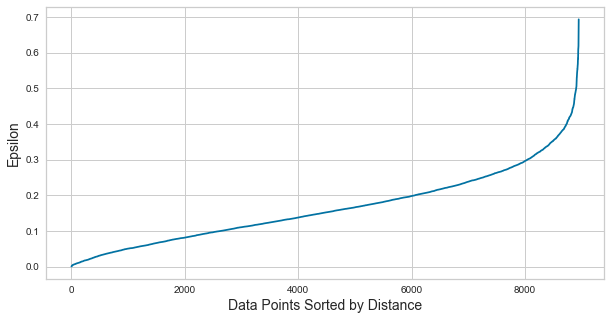

In [106]:
#plotting jumlah data terhadap epsilon
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
p=max(distances)+0.5
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()


Belokan tajam atau maximum curvature terjadi di rentang 0.35-0.4, maka nilai epsilon tersebut yang digunakan pada model.

Berikut hasil clustering dari DBSCAN.

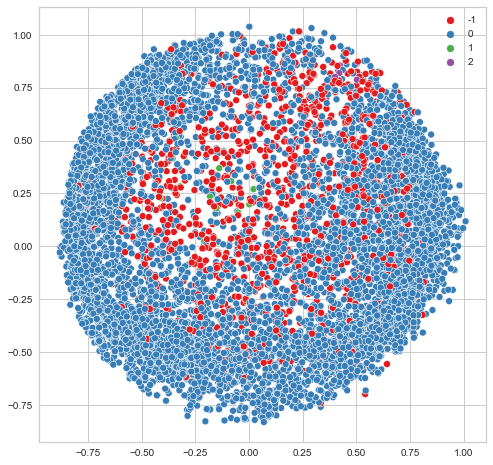

In [107]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_pca_vis2d[:,0], y=df_pca_vis2d[:,1], hue=db_label, palette='Set1')
plt.show()

DBSCAN mendeteksi ada tiga kluster utama dan satu kluster noise. Jika dilihat pada grafik, yang terlihat hanya cluster 0 (biru), sedikit cluster 1 (hijau) di tengah, dan noise (merah). Cluster 2 (ungu) malah tidak terlihat sama sekali. Disimpulkan bahwa DBSCAN tidak dapat memprediksi jumlah kluster dengan bentuk data seperti ini.

### 8.4. Cluster Exploratory Data Analysis

Cek identitas kluster yang dihasilkan menggunakan label dari K-Means.

In [108]:
df_num['cluster'] = km_label

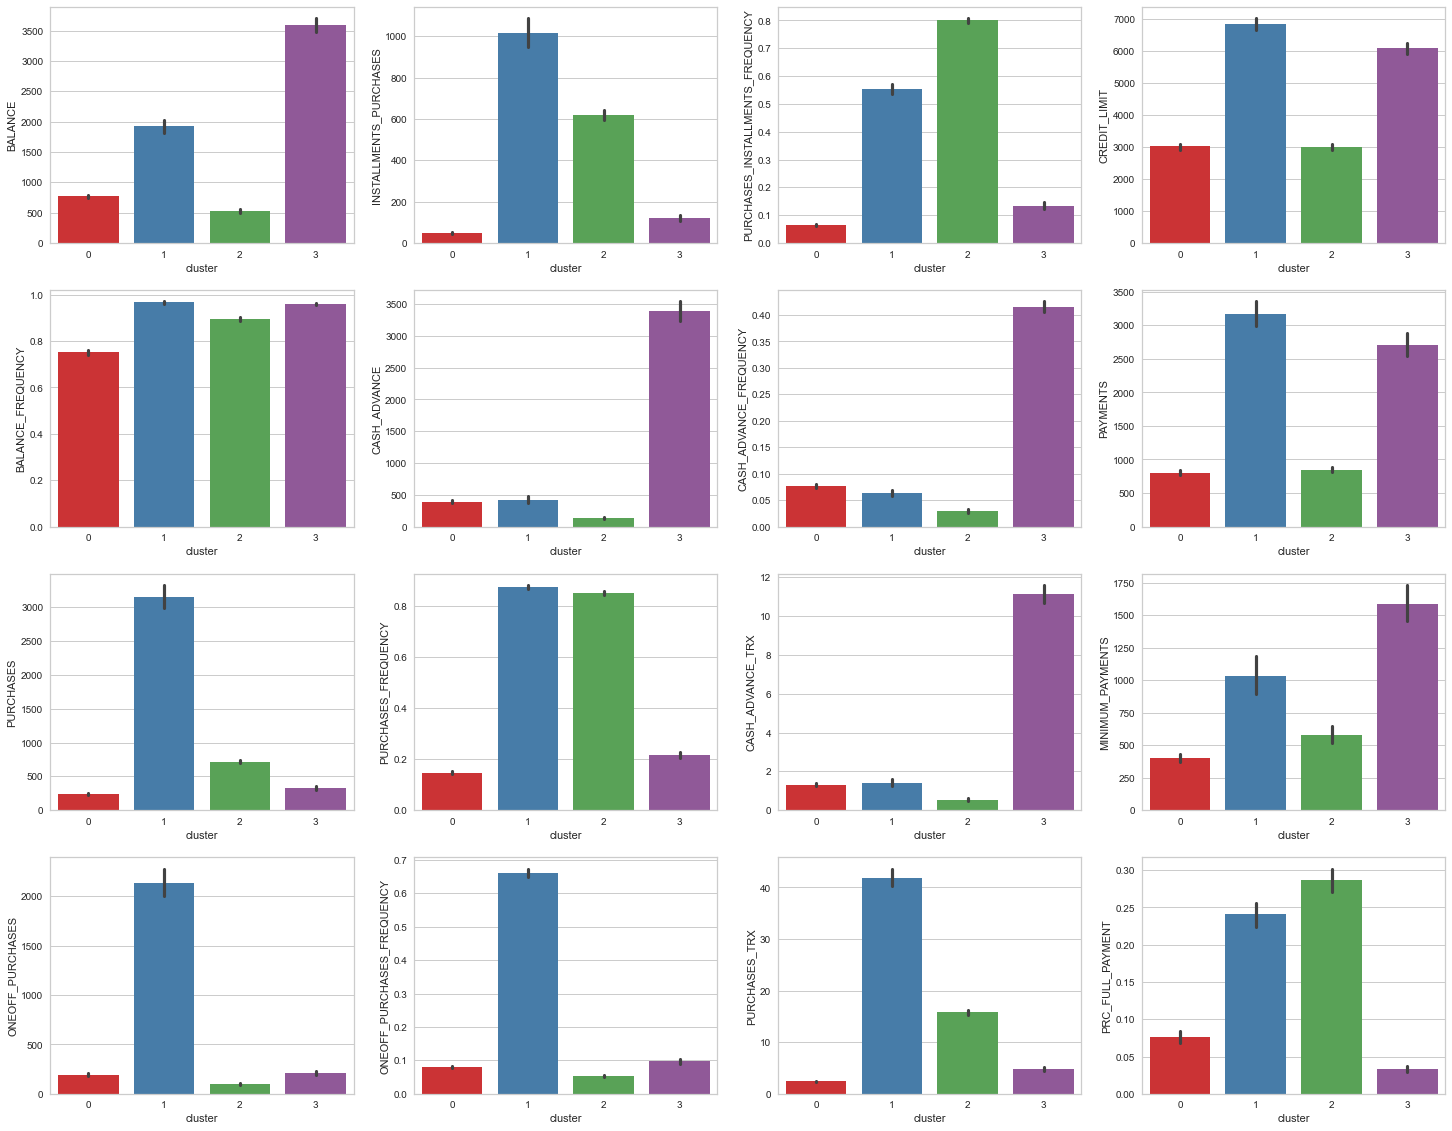

In [109]:
#indikator posisi grafik pada grid
i=0
j=0

#loop grid barplot
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(25,20))
for col in df_num.columns:
    if col != 'cluster':
        sns.barplot(x=df_num['cluster'], y=df_num[col], color=df_num['cluster'], palette='Set1', ax=ax[i%4,j])

    i+=1
    if i%4==0:
        j+=1

plt.show()

Dari barplot yang dihasilkan, bisa disimpulkan bahwa:
- cluster 0 (merah) adalah cluster yang paling jarang menggunakan kartu kreditnya
- cluster 1 (biru) merupakan frequent shopper yang paling sering berbelanja dan dengan jumlah yang besar
- cluster 2 (hijau) juga merupakan frequent shopper, tetapi dengan daya beli yang lebih rendah dibanding cluster 1 dilihat dari banyaknya pembayaran cicilan dan nilai belanja yang lebih kecil
- cluster 3 (ungu) adalah cluster yang paling banyak melakukan penarikan `CASH_ADVANCE`

## 9. Model Inference

Lakukan prediksi pada inference set dengan tahapan berikut:
- drop kolom kategorikal dan primary key
- standard scale
- normalisasi
- reduksi komponen menjadi 95% EVR
- prediksi cluster

In [110]:
df_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7272,C17468,857.256959,0.909091,636.84,484.2,152.64,2224.941246,0.416667,0.166667,0.166667,0.500000,11,7,3000.0,443.001353,301.273706,0.000000,12
3432,C13529,874.800721,0.909091,0.00,0.0,0.00,557.540201,0.000000,0.000000,0.000000,0.166667,2,0,1700.0,1915.107195,200.032263,0.090909,12
829,C10860,4270.148411,0.888889,363.00,363.0,0.00,5307.322893,0.111111,0.111111,0.000000,0.555556,11,2,5500.0,1250.695005,2070.907379,0.000000,9


In [111]:
#drop kolom kategorikal dan primary key
df_inf_cleaned = df_inf.drop(['TENURE','CUST_ID'],axis=1)

In [112]:
#scale dan normalisasi
df_inf_scaled = scaler.transform(df_inf_cleaned)
df_inf_scaled = normalizer.transform(df_inf_scaled)

In [113]:
#reduksi komponen dengan PCA
df_inf_pca = pca.transform(df_inf_scaled)

In [114]:
#prediksi cluster
df_inf['cluster'] = kmeans.predict(df_inf_pca)

In [115]:
df_inf['cluster']

7272    3
3432    0
829     3
Name: cluster, dtype: int32

Inference set berhasil diprediksi kluster-nya.

## 10. Kesimpulan

Berikut kesimpulan yang didapat berdasarkan analisis yang telah dilakukan:
1. Komponen atau feature direduksi menjadi 10 berdasarkan VIF dan EVR
2. K-Means menghasilkan prediksi terbaik pada dataset ini setelah standardisasi dan normalisasi
3. Cluster yang dihasilkan memiliki karakteristik sebagai berikut:
    - cluster 0 (merah) adalah user kredit pinjam tunai, user yang menggunakan kartu kredit untuk `CASH_ADVANCE`
    - cluster 1 (biru) adalah major shopper, user yang sering berbelanja dan dengan jumlah yang besar
    - cluster 2 (hijau) adalah passive user, user yang jarang menggunakan credit card-nya
    - cluster 3 (ungu) adalah minor shopper, user yang sering berbelanja tetapi dengan daya beli yang lebih rendah dibanding major shopper